# Ice Validation

Author: Adele Morrison

In [3]:
%matplotlib inline

from glob import glob
import os,sys
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

In [1]:
# model output here:
model = 'mom025'
DataDir = '/g/data3/hh5/tmp/cosima/'+model+'/'
expt = 'mom025_nyf'
expdir = os.path.join(DataDir, expt)
# sea ice observation data here:
ObsDir = '/g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/'
ObsDirExt = '/g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/'

figdir = '/g/data/v45/akm157/figures/mom025_diagnostics/sea_ice/'

# get model grid data:
gridFileList = glob(os.path.join(expdir, 'output*/ocean_grid.nc'))
gridFileList.sort()
ncFile = nc.Dataset(gridFileList[0])
xt_ocean = ncFile.variables['xt_ocean'][...]
yt_ocean = ncFile.variables['yt_ocean'][...]
lon_t = ncFile.variables['geolon_t'][...]
lat_t = ncFile.variables['geolat_t'][...]
area_t = ncFile.variables['area_t'][...]
NLAT_half = int(np.shape(area_t)[0]/2)
ht = ncFile.variables['ht'][...]
land_mask = np.copy(ht)
land_mask[np.where(ht>30)] = 0
land_mask[np.where(ht<30)] = 1

# path to model sea ice output:
dataFileList = glob(os.path.join(expdir, 'output*/ice_month.nc'))
dataFileList.sort()

# paths to obs output:
obsNHFileList = glob(os.path.join(ObsDir, 'nh/*.nc'))
obsNHFileList.sort()
obsSHFileList = glob(os.path.join(ObsDir, 'sh/*.nc'))
obsSHFileList.sort()
obsExtSHFileList = glob(os.path.join(ObsDirExt, 'sh/*.csv'))
obsExtSHFileList.sort()
obsExtNHFileList = glob(os.path.join(ObsDirExt, 'nh/*.csv'))
obsExtNHFileList.sort()

font = {'size':13}
tick_font=13

opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output000/ice_month.nc


/short/v45/jm0634/conda/envs/cosima/lib/python3.6/site-packages/numpy/ma/core.py:1016: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output001/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output002/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output003/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output004/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output005/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output006/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output007/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output008/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output009/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output010/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output011/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output012/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output013/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/o

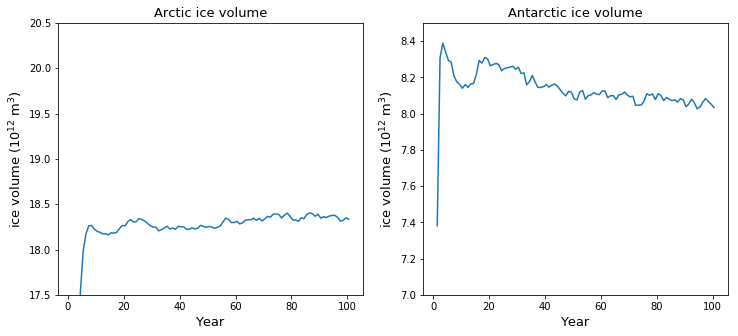

In [4]:
############################################
# time series of north and south annual sea ice volume
NH_ice_volume = []
SH_ice_volume = []
time = []
for IceFile in dataFileList:
	print('opening '+IceFile)
	ncFile = nc.Dataset(IceFile)
	HI = ncFile.variables['HI'][...]
	time_temp = ncFile.variables['time'][...]
	volume_temp = np.sum(HI*area_t,axis=-1)
	NH_ice_volume = np.append(NH_ice_volume,np.sum(volume_temp[:,NLAT_half:],axis=-1))
	SH_ice_volume = np.append(SH_ice_volume,np.sum(volume_temp[:,:NLAT_half],axis=-1))
	time = np.append(time,time_temp)

# do annual averages:
n_years = int(len(time)/12)
NH_annual_volume = np.zeros(n_years)
SH_annual_volume = np.zeros(n_years)
time_annual = np.zeros(n_years)
for year in range(n_years):
	NH_annual_volume[year] = np.mean(NH_ice_volume[year*12:(year+1)*12])
	SH_annual_volume[year] = np.mean(SH_ice_volume[year*12:(year+1)*12])
	time_annual[year] = np.mean(time[year*12:(year+1)*12])
	
plt.figure(1,(12,5))
plt.clf()
plt.subplot(1,2,1)
plt.plot(time_annual/365+1,NH_annual_volume/1e12)
plt.xlabel('Year',font)
plt.ylabel(r'ice volume (10$^{12}$ m$^3$)',font)
plt.title('Arctic ice volume',font)
plt.ylim((17.5,20.5))

plt.subplot(1,2,2)
plt.plot(time_annual/365+1,SH_annual_volume/1e12)
plt.xlabel('Year',font)
plt.ylabel(r'ice volume (10$^{12}$ m$^3$)',font)
plt.title('Antarctic ice volume',font)
plt.ylim((7,8.5))
plt.show()
plt.draw()

plt.show()

In [5]:
################## extent seasonal cycle
## obs extent:
# just take years 79-98 where available:
SH_extent_climatology_obs = np.zeros(12)
import csv
for month in range(12):
	n_years = 0
	print('opening '+obsExtSHFileList[month])
	with open(obsExtSHFileList[month]) as csvfile:
		reader = csv.reader(csvfile)
		rownum = 0
		for row in reader:
			if (rownum > 0 and float(row[-2])>0 and float(row[0])>1978 \
				and float(row[0])<1999):
				SH_extent_climatology_obs[month] += float(row[-2])
				n_years = n_years + 1
			rownum = rownum + 1
	SH_extent_climatology_obs[month] = SH_extent_climatology_obs[month] / n_years

NH_extent_climatology_obs = np.zeros(12)
import csv
for month in range(12):
	n_years = 0
	print('opening '+obsExtNHFileList[month])
	with open(obsExtNHFileList[month]) as csvfile:
		reader = csv.reader(csvfile)
		rownum = 0
		for row in reader:
			if (rownum > 0 and float(row[-2])>0 and float(row[0])>1978 \
				and float(row[0])<1999):
				NH_extent_climatology_obs[month] += float(row[-2])
				n_years = n_years + 1
			rownum = rownum + 1
	NH_extent_climatology_obs[month] = NH_extent_climatology_obs[month] / n_years

opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_01_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_02_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_03_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_04_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_05_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_06_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_07_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_08_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_09_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_10_extent_v2.1.csv
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02135_extent_monthly/sh/S_11_extent_v2.1.csv
opening /g/data/v45/a

In [6]:
# climatological seasonal cycle of annual sea ice area - take monthly averages of 
# concentration, then sum area where CN > 15%
# for last 10 years of control:
ice_area_south = []
ice_area_north = []
# length of climatology:
n_years = 10
if model=='mom025':
	n_files = n_years
elif model=='mom01v5':
	n_files = 4*n_years
for IceFile in dataFileList[-n_files:]:
	print('opening '+IceFile)
	ncFile = nc.Dataset(IceFile)
	CN = np.sum(ncFile.variables['CN'][...],axis=1)
	for month in range(CN.shape[0]):
		area_field = np.where(CN[month,...]>0.15,area_t,0)
		ice_area_south = np.append(ice_area_south,np.sum(area_field[:NLAT_half,...]))
		ice_area_north = np.append(ice_area_north,np.sum(area_field[NLAT_half:,...]))

opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output090/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output091/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output092/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output093/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output094/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output095/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output096/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output097/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output098/ice_month.nc
opening /g/data3/hh5/tmp/cosima/mom025/mom025_nyf/output099/ice_month.nc


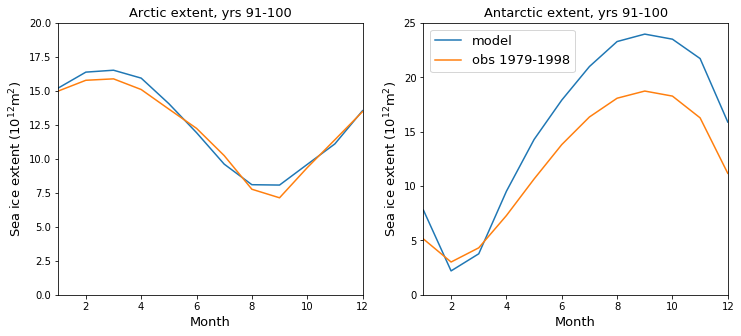

In [8]:
# do annual averages:
ice_area_south_climatology = np.zeros(12)
ice_area_north_climatology = np.zeros(12)
for month in range(12):
	ice_area_south_climatology[month] = np.mean(ice_area_south[month::12])
	ice_area_north_climatology[month] = np.mean(ice_area_north[month::12])
# sort months from Jan -> Dec (for mom01 we don't necessarily start with Jan data)
time = ncFile.variables['time']
time_convert = nc.num2date(time[-1],time.units,time.calendar)
last_month = time_convert.month
last_year = time_convert.year
ice_area_south_climatology = np.roll(ice_area_south_climatology,last_month)
ice_area_north_climatology = np.roll(ice_area_north_climatology,last_month)

# Arctic seasonal cycle:
plt.figure(2,(12,5))
plt.clf()
plt.subplot(1,2,1)
plt.plot(np.arange(12)+1,ice_area_north_climatology/1e12,label = 'model')
plt.plot(np.arange(12)+1,NH_extent_climatology_obs)
plt.xlabel('Month',font)
plt.ylabel(r'Sea ice extent (10$^{12}$m$^2$)',font)
plt.title('Arctic extent, yrs '+str(last_year-(n_years-1))+'-'+str(last_year),font)
plt.ylim((0,20))
plt.xlim((1,12))

# Antarctic seasonal cycle:
plt.subplot(1,2,2)
plt.plot(np.arange(12)+1,ice_area_south_climatology/1e12,label = 'model')
plt.plot(np.arange(12)+1,SH_extent_climatology_obs,label="obs 1979-1998")
plt.xlabel('Month',font)
plt.ylabel(r'Sea ice extent (10$^{12}$m$^2$)',font)
plt.ylim((0,25))
plt.xlim((1,12))
plt.title('Antarctic extent, yrs '+str(last_year-(n_years-1))+'-'+str(last_year),font)
plt.legend(prop=font,loc=2)

plt.show()


In [9]:
############################################
# maps of summer/winter concentration:
####### obs climatology:
# for obs just use years 1988-1997, because concentration not available before then and 
# climate change after then
# Arctic March:
CN_obs_Mar_NH = 0
# length of climatology:
obs_Mar_list = [IceFile for IceFile in obsNHFileList if (IceFile.find('03_v02')>0 and 
	IceFile.find('nh_f')>0 and float(IceFile[-16:-12])>1987 and \
	float(IceFile[-16:-12])<1998)] 
n_years = len(obs_Mar_list)
for IceFile in obs_Mar_list:
	print('opening '+IceFile)
	ncFile = nc.Dataset(IceFile)
	CN_obs_Mar_NH = CN_obs_Mar_NH + ncFile.variables['seaice_conc_monthly_cdr'][0,...]
obs_lat_NH = ncFile.variables['latitude'][...]
obs_lon_NH = ncFile.variables['longitude'][...]
# divide by n_years and mask land / arctic pole hole:
CN_obs_Mar_NH = np.ma.masked_where(CN_obs_Mar_NH<0,CN_obs_Mar_NH) / n_years
CN_obs_Mar_NH = np.ma.masked_where(CN_obs_Mar_NH>2,CN_obs_Mar_NH)

opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f08_198803_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f08_198903_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f08_199003_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f08_199103_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f11_199203_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f11_199303_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f11_199403_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f11_199503_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f13_

In [10]:
# Arctic September:
CN_obs_Sep_NH = 0
# length of climatology:
obs_Sep_list = [IceFile for IceFile in obsNHFileList if (IceFile.find('09_v02')>0 and 
	IceFile.find('nh_f')>0 and float(IceFile[-16:-12])>1987 and \
	float(IceFile[-16:-12])<1998)] 
n_years = len(obs_Sep_list)
for IceFile in obs_Sep_list:
	print('opening '+IceFile)
	ncFile = nc.Dataset(IceFile)
	CN_obs_Sep_NH = CN_obs_Sep_NH + ncFile.variables['seaice_conc_monthly_cdr'][0,...]
# divide by n_years and mask land / arctic pole hole:
CN_obs_Sep_NH = np.ma.masked_where(CN_obs_Sep_NH<0,CN_obs_Sep_NH) / n_years
CN_obs_Sep_NH = np.ma.masked_where(CN_obs_Sep_NH>2,CN_obs_Sep_NH)

# Antarctic September:
CN_obs_Sep_SH = 0
# length of climatology:
obs_Sep_list = [IceFile for IceFile in obsSHFileList if (IceFile.find('09_v02')>0 and 
	IceFile.find('sh_f')>0 and float(IceFile[-16:-12])>1987 and \
	float(IceFile[-16:-12])<1998)] 
n_years = len(obs_Sep_list)
for IceFile in obs_Sep_list:
	print('opening '+IceFile)
	ncFile = nc.Dataset(IceFile)
	CN_obs_Sep_SH = CN_obs_Sep_SH + ncFile.variables['seaice_conc_monthly_cdr'][0,...]
obs_lat_SH = ncFile.variables['latitude'][...]
obs_lon_SH = ncFile.variables['longitude'][...]
# divide by n_years and mask land / arctic pole hole:
CN_obs_Sep_SH = np.ma.masked_where(CN_obs_Sep_SH<0,CN_obs_Sep_SH) / n_years
CN_obs_Sep_SH = np.ma.masked_where(CN_obs_Sep_SH>2,CN_obs_Sep_SH)

# Antarctic February:
CN_obs_Feb_SH = 0
# length of climatology:
obs_Feb_list = [IceFile for IceFile in obsSHFileList if (IceFile.find('02_v02')>0 and 
	IceFile.find('sh_f')>0 and float(IceFile[-16:-12])>1987 and \
	float(IceFile[-16:-12])<1998)] 
n_years = len(obs_Feb_list)
for IceFile in obs_Feb_list:
	print('opening '+IceFile)
	ncFile = nc.Dataset(IceFile)
	CN_obs_Feb_SH = CN_obs_Feb_SH + ncFile.variables['seaice_conc_monthly_cdr'][0,...]
# divide by n_years and mask land / arctic pole hole:
CN_obs_Feb_SH = np.ma.masked_where(CN_obs_Feb_SH<0,CN_obs_Feb_SH) / n_years
CN_obs_Feb_SH = np.ma.masked_where(CN_obs_Feb_SH>2,CN_obs_Feb_SH)

# maps of time mean Antarctic September and Feb (Arctic September and March) sea ice 
# concentration with 50% contour for obs and model drawn on

CN_Feb = 0
CN_Mar = 0
CN_Sep = 0
# length of climatology:
n_years = 10
if model=='mom025':
	n_files = n_years
elif model=='mom01v5':
	n_files = 4*n_years
for IceFile in dataFileList[-n_files:]:
	print('opening '+IceFile)
	ncFile = nc.Dataset(IceFile)
	time = ncFile.variables['time']
	for month_n in range(len(time)):
		# check calendar month:
		time_convert = nc.num2date(time[month_n],time.units,time.calendar)
		month = time_convert.month
		# sum over concentration levels:
		if month == 2:
			CN_Feb = CN_Feb + np.sum(ncFile.variables['CN'][month_n,:,:NLAT_half,:],axis=0)
		elif month == 3:
			CN_Mar = CN_Mar + np.sum(ncFile.variables['CN'][month_n,:,NLAT_half:,:],axis=0)
		elif month == 9:
			CN_Sep = CN_Sep + np.sum(ncFile.variables['CN'][month_n,:,:,:],axis=0)
# divide by n_years and mask:
CN_Feb = np.ma.masked_where(land_mask[:NLAT_half,:]==1,CN_Feb / n_years)
CN_Mar = np.ma.masked_where(land_mask[NLAT_half:,:]==1,CN_Mar / n_years)
CN_Sep = np.ma.masked_where(land_mask==1,CN_Sep / n_years)

last_year = time_convert.year

levels = np.arange(0,1.01,.01)
font = {'size':13}
tick_font=13

opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f08_198809_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f08_198909_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f08_199009_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f08_199109_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f11_199209_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f11_199309_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f11_199409_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f11_199509_v02r00.nc
opening /g/data/v45/akm157/data/NSIDC/NOAA_G02202_v2_conc_monthly/nh/seaice_conc_monthly_nh_f13_

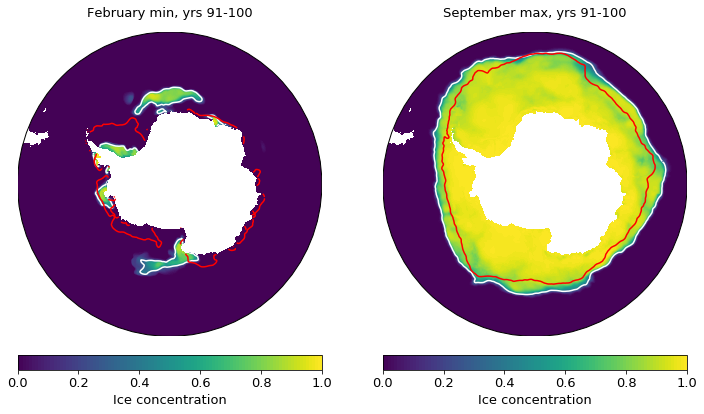

In [13]:
# Antarctic concentration maps:
plt.figure(3,(12,7))
plt.clf()
plt.subplot(1,2,1)
m = Basemap(projection ='spstere',boundinglat=-50,lon_0=180,resolution='l',round='True')
x,y = m(*(lon_t[:NLAT_half,:],lat_t[:NLAT_half,:]))
xobs,yobs = m(*(obs_lon_SH,obs_lat_SH))
ctr = m.contourf(x,y,CN_Feb,levels=levels,cmap='viridis')
plt.title('February min, yrs '+str(last_year-(n_years-1))+'-'+
	str(last_year),font,y=1.03)
cbar = m.colorbar(ctr, location = 'bottom', pad = "6%")
cbar.set_label('Ice concentration',size=tick_font)
cbar.set_ticks([0,.2,.4,.6,.8,1])
cbar_labels=plt.getp(cbar.ax.axes,'xticklabels')
plt.setp(cbar_labels,fontsize=tick_font)
#m.contour(x,y,land_mask[:NLAT_half,:],[0,1],colors='w')
m.contour(x,y,CN_Feb,[0.3],colors='w')
# obs:
m.contour(xobs,yobs,CN_obs_Feb_SH,[0.3],colors='r')

plt.subplot(1,2,2)
m = Basemap(projection ='spstere',boundinglat=-50,lon_0=180,resolution='l',round='True')
ctr = m.contourf(x,y,CN_Sep[:NLAT_half,:],levels=levels,cmap='viridis')
plt.title('September max, yrs '+str(last_year-(n_years-1))+'-'+
	str(last_year),font,y=1.03)
cbar = m.colorbar(ctr, location = 'bottom', pad = "6%")
cbar.set_label('Ice concentration',size=tick_font)
cbar.set_ticks([0,.2,.4,.6,.8,1])
cbar_labels=plt.getp(cbar.ax.axes,'xticklabels')
plt.setp(cbar_labels,fontsize=tick_font)
#m.contour(x,y,land_mask[:NLAT_half,:],[0,1],colors='w')
m.contour(x,y,CN_Sep[:NLAT_half,:],[0.3],colors='w')
# obs:
m.contour(xobs,yobs,CN_obs_Sep_SH,[0.3],colors='r')
plt.show()

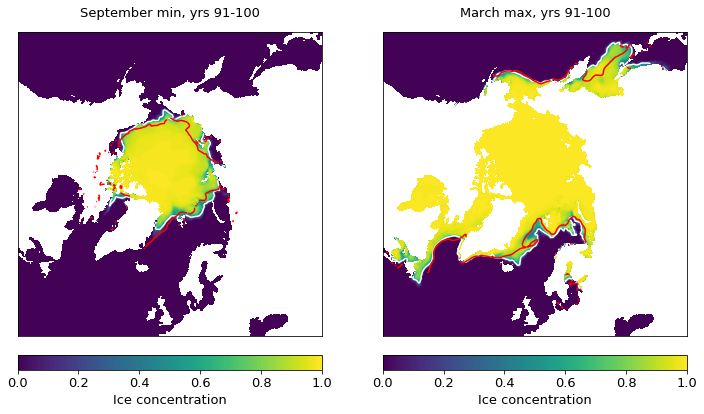

In [14]:
# Arctic concentration maps:
plt.figure(4,(12,7))
plt.clf()
plt.subplot(1,2,1)
m = Basemap(projection ='npstere',boundinglat=48,lon_0=0,resolution='l')
x,y = m(*(lon_t[NLAT_half:,:],lat_t[NLAT_half:,:]))
xobs,yobs = m(*(obs_lon_NH,obs_lat_NH))
ctr = m.contourf(x,y,CN_Sep[NLAT_half:,:],levels=levels,cmap='viridis')
plt.title('September min, yrs '+str(last_year-(n_years-1))+'-'+
	str(last_year),font,y=1.03)
cbar = m.colorbar(ctr, location = 'bottom', pad = "6%")
cbar.set_label('Ice concentration',size=tick_font)
cbar.set_ticks([0,.2,.4,.6,.8,1])
cbar_labels=plt.getp(cbar.ax.axes,'xticklabels')
plt.setp(cbar_labels,fontsize=tick_font)
#m.contour(x,y,land_mask[NLAT_half:,:],[0,1],colors='w')
m.contour(x,y,CN_Sep[NLAT_half:,:],[0.3],colors='w')
# obs:
m.contour(xobs,yobs,CN_obs_Sep_NH,[0.3],colors='r')

plt.subplot(1,2,2)
m = Basemap(projection ='npstere',boundinglat=48,lon_0=0,resolution='l')
ctr = m.contourf(x,y,CN_Mar,levels=levels,cmap='viridis')
plt.title('March max, yrs '+str(last_year-(n_years-1))+'-'+
	str(last_year),font,y=1.03)
cbar = m.colorbar(ctr, location = 'bottom', pad = "6%")
cbar.set_label('Ice concentration',size=tick_font)
cbar.set_ticks([0,.2,.4,.6,.8,1])
cbar_labels=plt.getp(cbar.ax.axes,'xticklabels')
plt.setp(cbar_labels,fontsize=tick_font)
#m.contour(x,y,land_mask[NLAT_half:,:],[0,1],colors='w')
m.contour(x,y,CN_Mar,[0.3],colors='w')
# obs:
m.contour(xobs,yobs,CN_obs_Mar_NH,[0.3],colors='r')

plt.show()